# Sistem Rekomendasi Movie - Submission Machine Learning Terapan
Nama : Sukma Ramadhan Asri  
Asal : Bandung, Jawabarat

## Project Overview

Sistem rekomendasi movie merupakan sistem yang merekomendasikan movie kepada penonton atau pengguna lainnya, rekomendasi ini contohnya diterapkan pada situs seperti netflix, iqiyi, dan wetv. Sistem rekomendasi yang saya buat ini didasarkan dengan peferensi kesukaan pengguna dimasa lalu, serta rating dari movie tersebut.
Sistem rekomendasi telah menjadi lazim dalam beberapa tahun terakhir karena mereka menangani masalah kelebihan informasi dengan menyarankan pengguna produk yang paling relevan dari sejumlah besar data. Untuk produk media, rekomendasi film kolaboratif online berupaya membantu pengguna mengakses film pilihan mereka dengan menangkap tetangga yang persis sama di antara pengguna atau film dari peringkat umum historis mereka. Namun, karena data yang jarang, pemilihan tetangga menjadi lebih sulit dengan meningkatnya film dan pengguna dengan cepat. Dalam makalah ini, diusulkan sistem rekomendasi film berbasis model hibrida yang memanfaatkan pengelompokan K-means yang ditingkatkan ditambah dengan algoritma genetika (GAs) untuk mempartisi ruang pengguna yang ditransformasikan. Ini menggunakan teknik reduksi data analisis komponen utama (PCA) untuk memadat ruang populasi film yang juga dapat mengurangi kompleksitas komputasi dalam rekomendasi film cerdas. Hasil eksperimen pada dataset Movielens menunjukkan bahwa pendekatan yang diusulkan dapat memberikan kinerja tinggi dalam hal akurasi, dan menghasilkan rekomendasi film yang lebih andal dan personal jika dibandingkan dengan metode yang ada.

referensi dari proyek overview yang saya buat dapat dilihat dari tautan berikut :
[Journal of Visual Languages & Computing](https://www.sciencedirect.com/science/article/abs/pii/S1045926X14000901)

## Business Understanding

### Problem Statements

1. Bagaimana cara merekomendasikan movie yang disukai pengguna lain dapat direkomendasikan kepada pengguna lainnya juga ?

### Goals

Dapat membuat sistem rekomendasi yang akurat berdasarkan ratings dan aktivitas pengguna pada masa lalu.

### Solution approach

Solusi yang saya buat yaitu dengan menggunakan 2 algoritma Machine Learning sistem rekomendasi,yaitu :

- **Content Based Filtering** adalah algoritma yang merekomendasikan item serupa dengan apa yang disukai pengguna, berdasarkan tindakan mereka sebelumnya atau umpan balik eksplisit.
- **Collaborative Filtering**. adalah algoritma yang bergantung pada pendapat komunitas pengguna. Dia tidak memerlukan atribut untuk setiap itemnya.

Algoritma Content Based Filtering digunakan untuk merekemondesikan movie berdasarkan aktivitas pengguna pada masa lalu, sedangkan algoritma Collabarative Filltering digunakan untuk merekomendasikan movie berdasarkan ratings yang paling tinggi.

Install opendatasets yaitu library untuk mendownload dataset

In [ ]:
!pip install opendatasets


Import library opendatasets

In [ ]:
import opendatasets as od

## Data Understanding

Data atau dataset yang digunakan pada proyek machine learning ini adalah data **Movie Recommendation Data** yang didapat dari situs kaggle. Link dataset dapat dilihat dari tautan berikut [movie-recommendation-data](https://www.kaggle.com/rohan4050/movie-recommendation-data)

download dataset yang dibutuhkan, dengan menambah baris code seperti berikut :

In [ ]:
od.download('https://www.kaggle.com/rohan4050/movie-recommendation-data?select=ml-latest-small')

Skipping, found downloaded files in "./movie-recommendation-data" (use force=True to force download)


Selanjutnya, baca data-data di atas dengan menggunakan fungsi pandas.read_csv

In [ ]:
import pandas as pd
 
links = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/links.csv')
movies = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/tags.csv')

print('Jumlah data link movie : ', len(links.movieId.unique()))
print('Jumlah data movie : ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.userId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))


Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari user :  9724
Jumlah data :  1572


### Univariate Exploratory Data Analysis
Variabel-variabel pada movie-recommendation-data adalah sebagai berikut :

- links : merupakan daftar link movie tersebut.
- movies : merupakan daftar movie yang tersedia.
- ratings : merupakan daftar penilaian yang diberikan pengguna terhadap movie.
- tags : merupakan daftar kata kunci dari movie tersebut


####  Link Variabel
 eksplorasi variabel links, merupakan daftar link movie tersebut.

In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


####  movies Variabel
 eksplorasi variabel movies yang merupakan daftar movie yang tersedia.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### Ratings
 eksplorasi data yang akan digunakan pada model yaitu data ratings.

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


cek nilai data dari data ratings

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Dari output di atas, diketahui bahwa nilai maksimum ratings adalah 5 dan nilai minimumnya adalah 0.5. Artinya, skala rating berkisar antara 0.5 hingga 5. 

## Data Preprocessing


### Menggabungkan Movie
menggabungkan beberapa file dengan fungsi concatenate berdasarkan pada movieId, gabungkan seluruh data pada variabel movie_all





In [ ]:
import numpy as np
 
# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))
 
# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))
 
print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


### Menggabungkan Seluruh User
menggabungkan beberapa file dengan fungsi concatenate berdasarkan pada userId, gabungkan seluruh data pada variabel user_all

In [ ]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
   
))
 
# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


Menggabungkan file links, movies, ratingsm tags ke dalam dataframe movie_info. Serta menggabungkan dataframe ratings dengan movie_info berdasarkan nilai movieId

In [ ]:
movie_info = pd.concat([links, movies, ratings, tags])
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


seperti yang dilihat dari hasil diatas terdapat banyak sekali missing value maka lakukan cek missing value


In [ ]:
movie.isnull().sum()

userId_x             0
movieId              0
rating_x             0
timestamp_x          0
imdbId         6258749
tmdbId         6258762
title          6258749
genres         6258749
userId_y        201672
rating_y        434885
timestamp_y     201672
tag            6126372
dtype: int64

menggabungkan rating berdasarkan movieId

In [ ]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,userId_y,rating_y,timestamp_y
movieId,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,14465415.0,181245.0,5.304394e+13
2,4205116,43790.0,14492875665352,12484670.0,972840.0,4060210.0,41525.0,1.437287e+13
3,825832,9492.0,2926881125616,5887856.0,811304.0,796900.0,8814.0,2.836734e+12
4,13851,148.5,56610468432,804195.0,219499.0,10773.0,115.5,4.403036e+10
5,777987,7976.5,2577949287482,5539009.0,581238.0,765723.0,7374.5,2.494850e+12
...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,184.0,4.0,1.537109e+09
193583,552,10.5,4611328635,5914996.0,445030.0,184.0,3.5,1.537110e+09
193585,552,10.5,4611329415,6397426.0,479308.0,184.0,3.5,1.537110e+09


### Menggabungkan Data dengan Fitur Nama Movie

mendefinisikan variabel all_movie_rate dengan variabel ratings 

In [ ]:
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Menggabungkan all movie_rate dengan dataframe movies berdasarkan movieId 

In [ ]:
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Menggabungkan dataframe tags dengan all_movie_name berdasarkan movieId dan memasukkannya ke dalam variabel all_movie

In [ ]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


## Data Preparation


### Mengatasi Missing Value
Mencari data apakah ada data kosong atau tidak

In [ ]:
all_movie.isnull().sum()


userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          52549
dtype: int64

ternyata dari data diatas terdapat data kosong pada kolom tag yaitu 52549, maka dilakukanlah pembersihan missing value dengan fungsi dropna()

In [ ]:
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


data di atas beruabh menjadi 233213 baris yang awalnya 285762 baris. 
cek kembali missing value pada variabel all_movie_clean


In [ ]:
all_movie_clean.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64

Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie

In [ ]:
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


Mengecek berapa jumlah fix_movie

In [ ]:
len(fix_movie.movieId.unique())

1554

Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId

In [ ]:
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


Selanjutnya, gunakan data unik untuk dimasukkan ke dalam proses pemodelan. 
serta hapus data duplicate dengan fungsi drop_duplicates() berdasarkan movieId

In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


Selanjutnya,  melakukan konversi data series menjadi list. Dalam hal ini, menggunakan fungsi tolist() dari library numpy. Implementasikan 

In [ ]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()
 
# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


membuat dictionary untuk menentukan pasangan key-value pada data movie_id, movie_name, dan movie_genre yang telah disiapkan sebelumnya.

In [ ]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## Modeling and Result

- Proses modeling yang saya lakukan pada data ini adalah dengan membuat algoritma machine learning, yaitu content based filtering dan collabrative filtering. untuk algoritma content based filtering saya buat dengan apa yang disukai pengguna pada masa lalu, sedangkan untuk content based filtering, saya buat dengan memanfaatkan tingkat rating dari movie tersebut.


1. Model Development dengan Content Based Filtering


 menggukan fungsi TFIDFVectorizer()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks. 

In [ ]:
tfidf_matrix = tf.fit_transform(movie_new['genre']) 
tfidf_matrix.shape 

(1554, 24)

 
 menghasilkan vektor tf-idf dalam bentuk matriks, menggunakan fungsi todense(). 

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

lihat matriks tf-idf untuk beberapa movie (movie_name) dan genre

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=movie_new.movie_name
).sample(22, axis=1).sample(10, axis=0)

,sci,genres,drama,western,children,musical,fi,adventure,action,crime,noir,animation,horror,no,war,documentary,fantasy,comedy,mystery,romance,imax,thriller
movie_name,,,,,,,,,,,,,,,,,,,,,,
Manhunter (1986),0.0,0.0,0.243881,0.000000,0.0,0.0,0.0,0.0,0.446139,0.467913,0.0,0.0,0.593487,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.412689
Blazing Saddles (1974),0.0,0.0,0.000000,0.924368,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.381501,0.000000,0.0,0.0,0.000000
Picnic at Hanging Rock (1975),0.0,0.0,0.414161,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.910204,0.0,0.0,0.000000
"Royal Tenenbaums, The (2001)",0.0,0.0,0.600342,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.799743,0.000000,0.0,0.0,0.000000
Arsenic and Old Lace (1944),0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.432936,0.714234,0.0,0.0,0.549942
"Women, The (1939)",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000
Big Eyes (2014),0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Breaking the Waves (1996),0.0,0.0,0.414161,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.910204,0.0,0.0,0.000000
Following (1998),0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.568883,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.651635,0.0,0.0,0.501742


 **Cosine Similarity**
 menghitung derajat kesamaan (similarity degree) antar movie dengan teknik cosine similarity.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Membuat dataframe dari variabel cosine_sim_df dengan baris dan kolom berupa nama movie, serta melihat kesamaan matrix dari setiap movie

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Captain Phillips (2013),Paprika (Papurika) (2006),Look Who's Talking (1989),Friendly Persuasion (1956),Harry Potter and the Prisoner of Azkaban (2004)
movie_name,,,,,
Psycho (1960),0.000000,0.000000,0.000000,0.000000,0.000000
Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986),0.150265,0.583093,0.000000,0.000000,0.353917
Juno (2007),0.104887,0.000000,0.900930,0.433964,0.000000
Northfork (2003),0.097866,0.000000,0.000000,0.404916,0.481944
Ringu (Ring) (1998),0.187561,0.296327,0.000000,0.000000,0.000000
All About Eve (1950),0.241695,0.000000,0.000000,1.000000,0.000000
Aliens (1986),0.185175,0.420138,0.000000,0.000000,0.178833
Grave of the Fireflies (Hotaru no haka) (1988),0.065668,0.375058,0.000000,0.271700,0.000000
"Three Musketeers, The (1973)",0.290987,0.000000,0.290389,0.000000,0.281021


## Mendapatkan Rekomendasi
 membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

- Nama_movie : Nama judul dari movie tersebut (index kemiripan dataframe).  
- Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_name’ dan ‘genre’.  
- k : Banyak rekomendasi yang ingin diberikan.  




In [ ]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):
   
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)


 terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Jumanji (1995).

In [ ]:
movie_new[movie_new.movie_name.eq('Jumanji (1995)')]

,id,movie_name,genre
1,2,Jumanji (1995),Adventure|Children|Fantasy


dari hasil di atas dapat dilihat bahwa pengguna menyukai movie yang berjudul jumanji (1995) yang bergenre Adventure, Children, Fantasy.  
Mendapatkan rekomendasi movie yang mirip dengan Jumanji (1995).



In [ ]:
movie_recommendations('Jumanji (1995)')

,movie_name,genre
0,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy
1,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
2,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy
3,Lemony Snicket's A Series of Unfortunate Event...,Adventure|Children|Comedy|Fantasy
4,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy


Dari hasil rekomendasi di atas, diketahui bahwa Jumanji (1995) termasuk ke dalam genre  Adventure|Children|Fantasy. Dari 5 item yang direkomendasikan, 3 item memiliki genre Adventure|Children|Fantasy (similar). Artinya, precision sistem kita sebesar 3/5 atau 60%.

2. Model Development dengan Collaborative Filtering 

Import semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

ubah nama variabel ratings yang telah dibuat sebelumnya menjadi df.

In [ ]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Data Preparation
melakukan tahapan prepocessing

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya, lakukan hal yang sama pada fitur ‘movieId’.

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
 
# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.
 
# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float, cek nilai minimum dan maximum

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
df['ratings'] = df['rating'].values.astype(np.float32)
 
min_rating = min(df['rating'])
 
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


**Membagi Data untuk Training dan Validasi**


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


membagi data train dan validasi dengan komposisi 80:20. 

In [ ]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values
 
# Membuat variabel y untuk membuat ratings dari hasil 
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


lakukan proses training


In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

## Evaluation 
Selanjutnya, lakukan proses compile terhadap model. serta menggunakan matrix evaluasi RMSE



In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai proses training dengan batch size sebesar 64 serta epoch 100 kali

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1261/1261 [==============================] - 15s 11ms/step - loss: 0.6389 - root_mean_squared_error: 0.2350 - val_loss: 0.6208 - val_root_mean_squared_error: 0.2152
Epoch 2/100
1261/1261 [==============================] - 13s 10ms/step - loss: 0.6146 - root_mean_squared_error: 0.2095 - val_loss: 0.6212 - val_root_mean_squared_error: 0.2151
Epoch 3/100
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6089 - root_mean_squared_error: 0.2034 - val_loss: 0.6152 - val_root_mean_squared_error: 0.2090
Epoch 4/100
1261/1261 [==============================] - 13s 10ms/step - loss: 0.6070 - root_mean_squared_error: 0.2013 - val_loss: 0.6135 - val_root_mean_squared_error: 0.2072
Epoch 5/100
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6065 - root_mean_squared_error: 0.2005 - val_loss: 0.6114 - val_root_mean_squared_error: 0.2047
Epoch 6/100
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6069 - root_mean_squared_error: 0.200

**Visualisasi Metrik**  
Untuk melihat visualisasi proses training

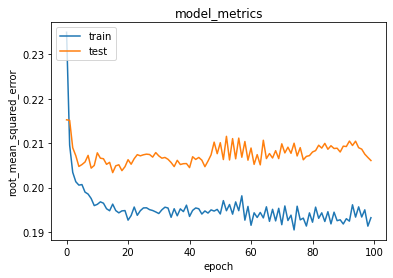

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dari visualisasi proses training model di atas cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.19 dan error pada data validasi sebesar 0.20. 

***Mendapatkan Rekomendasi movie***





In [ ]:
movie_df = movie_new
df = pd.read_csv('movie-recommendation-data/ml-latest-small/ratings.csv')
 

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]
 

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

untuk memperoleh rekomendasi movies, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

Showing recommendations for users: 474
movie with high ratings from user
--------------------------------
Enchanted April (1992) : Drama|Romance
Strictly Ballroom (1992) : Comedy|Romance
Moonstruck (1987) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Harry Potter and the Goblet of Fire (2005) : Adventure|Fantasy|Thriller|IMAX
--------------------------------
Top 10 movie recommendation
--------------------------------
Last Days of Disco, The (1998) : Comedy|Drama
Two Family House (2000) : Drama
Hope and Glory (1987) : Drama
More (1998) : Animation|Drama|Sci-Fi|IMAX
Come and See (Idi i smotri) (1985) : Drama|War
Into the Woods (1991) : Adventure|Comedy|Fantasy|Musical
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990) : Comedy|Drama
Reefer Madness: The Movie Musical (2005) : Comedy|Drama|Musical
Neon Genesis Evangelion: Death & Rebirth (Shin seiki Evangelion Gekijô-ban: Shito shinsei) (1997) : Action|Animation|Mystery|Sci-Fi
Captain Fantastic (2016) : Drama


dari hasi di atas movie yang bergenre comedy menjadi movie yang paling tinggi ratingsnya. Kemudian top 10 movie yang direkomendasikan sistem adalah movie dengan genre comedy dan drama.